In [27]:
import requests
from bs4 import BeautifulSoup
`
import pandas as pd
import numpy as np
#import html5lib 
import datetime
import time

import zipfile
import tabula
import PyPDF2
import fitz
import json


import matplotlib.pyplot as plt

In [32]:
for year in range(2008, datetime.datetime.now().year + 1):
    
    url = f'https://disclosures-clerk.house.gov/public_disc/financial-pdfs/{year}FD.ZIP'
    r = requests.get(url)
    with open(f'downloads/{url.split("/")[-1]}', 'wb') as f:
        f.write(r.content)
    
    with zipfile.ZipFile(f'downloads/{url.split("/")[-1]}', 'r') as zip:    
        zip.extractall(path = 'downloads/')
        

In [19]:
df = pd.read_xml('downloads/2023FD.xml')

df['FilingDate'] = pd.to_datetime(df['FilingDate'])
df['URL'] = [f"https://disclosures-clerk.house.gov/public_disc/ptr-pdfs/2023/{path}.pdf" for path in df['DocID']]
df.sort_values('FilingDate', ascending=False).head(20)

df[df['Last'] == 'Pelosi']

,Prefix,Last,First,Suffix,FilingType,StateDst,Year,FilingDate,DocID,URL
681,Hon.,Pelosi,Nancy,None,P,CA11,2023,2023-01-25,20022320,https://disclosures-clerk.house.gov/public_dis...
682,Hon.,Pelosi,Nancy,None,P,CA11,2023,2023-04-06,20022664,https://disclosures-clerk.house.gov/public_dis...
683,Hon.,Pelosi,Nancy,None,P,CA11,2023,2023-06-06,20023080,https://disclosures-clerk.house.gov/public_dis...
684,Hon.,Pelosi,Nancy,None,P,CA11,2023,2023-06-22,20023192,https://disclosures-clerk.house.gov/public_dis...
685,Hon.,Pelosi,Nancy,None,P,CA12,2023,2023-01-12,20022260,https://disclosures-clerk.house.gov/public_dis...


In [22]:
url = df.iloc[683]['URL']
print(url)

https://disclosures-clerk.house.gov/public_disc/ptr-pdfs/2023/20023080.pdf


In [25]:
response = requests.get(url)
with open(f'{url.split("/")[-1]}', 'wb') as f:
    f.write(response.content)

doc = fitz.open(url.split("/")[-1])


In [26]:
doc.page_count

1

In [28]:
page = doc.load_page(0)
json_data = page.get_text('dict')

In [31]:
import json

doc = fitz.open('downloads/2021/20020106.pdf')

page = doc.load_page(0)

json_data = page.get_text('dict')

data = []
for block in json_data['blocks']:
    if "lines" in block:
        #print()
        for line in block['lines']:
            line_data = ""
            for span in line['spans']:
                line_data += span['text'].upper()
            if len(line_data) > 1:
                #print(line_data)
                ...

## Recreating the PDF

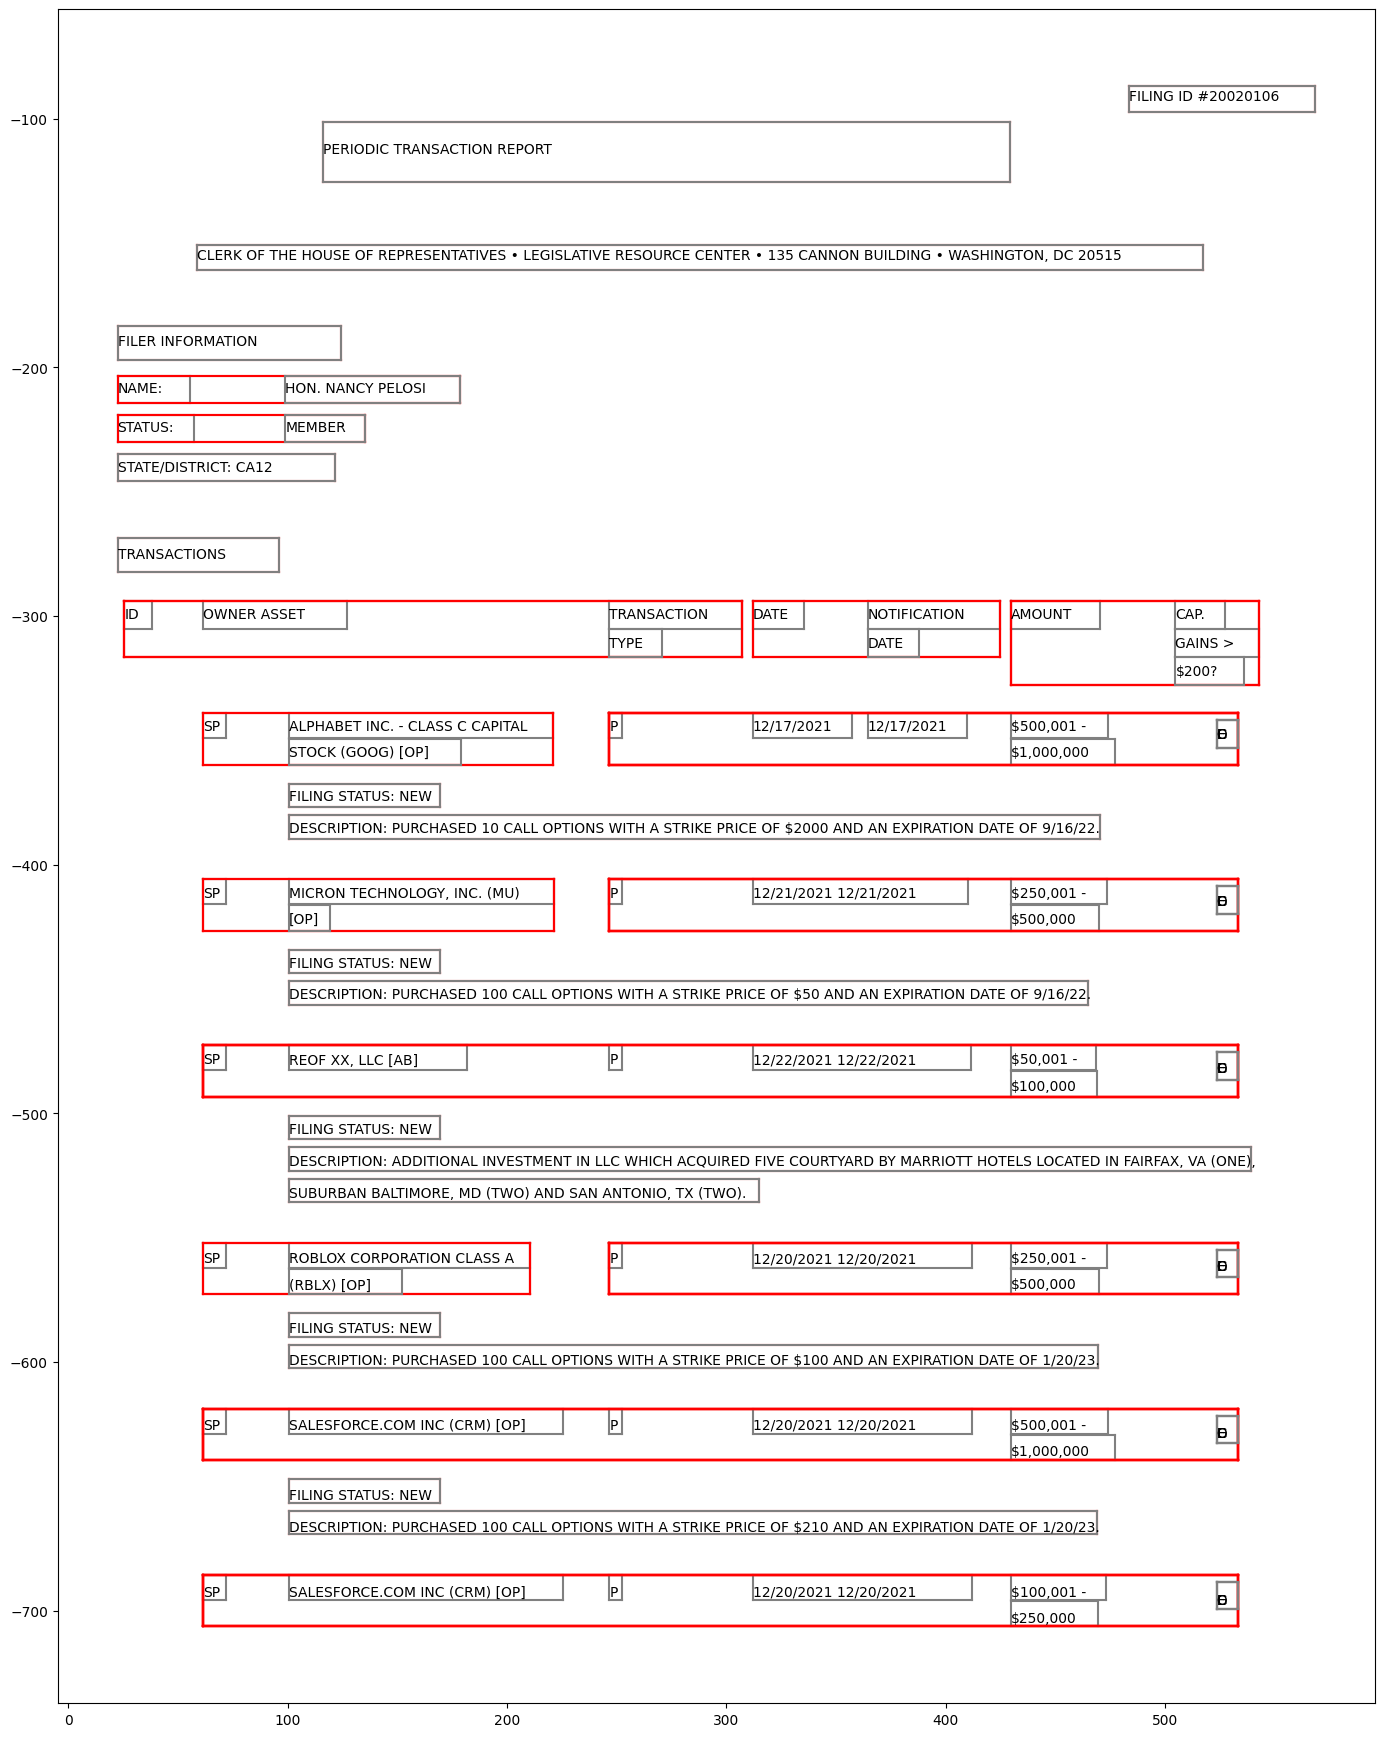

In [30]:
plt.figure(figsize=(8.5*2,11*2))
for block in json_data['blocks']:
    if "lines" in block:
       # print()
        for line in block['lines']:
            #print(line['bbox'])
            line_data = ""
            for span in line['spans']:
                line_data += span['text'].upper()
                
            x = block['bbox']
            x = list(x)
            x = [x[0], -x[1], x[2], -x[3]]
            plt.plot([x[0], x[0]], [x[1], x[3]], color = 'red')
            plt.plot([x[0], x[2]], [x[1], x[1]], color = 'red')
            plt.plot([x[0], x[2]], [x[3], x[3]], color = 'red')
            plt.plot([x[2], x[2]], [x[1], x[3]], color = 'red')

            x = line['bbox']
            x = list(x)
            x = [x[0], -x[1], x[2], -x[3]]
            plt.plot([x[0], x[0]], [x[1], x[3]], color = 'gray')
            plt.plot([x[0], x[2]], [x[1], x[1]], color = 'gray')
            plt.plot([x[0], x[2]], [x[3], x[3]], color = 'gray')
            plt.plot([x[2], x[2]], [x[1], x[3]], color = 'gray')



            x = line['bbox']
            x = list(x)
            x = [x[0], -x[1], x[2], -x[3]]

            plt.text(x[0], (x[3] + x[1])/1.99, line_data, fontsize=10)

plt.show()